<a href="https://colab.research.google.com/github/Memo1986/2020_opengeohub/blob/master/Lecci%C3%B3n_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Curso](https://geo-python-site.readthedocs.io/en/latest/index.html) de **Geo-Python 2021!**

## [Libro de Ciencia de datos espaciales en Python](https://geographicdata.science/book/intro.html)

## [Lección 2](https://geo-python-site.readthedocs.io/en/latest/notebooks/L2/Python-basic-elements.html)

En esta lección, aprenderemos cómo se pueden almacenar datos en listas de **Python**, algunas formas útiles de usar y modificar listas de **Python**, y cómo hacer que diferentes tipos de datos funcionen juntos en **Python**.

Como primer paso vamos a instalar las librerías necesarias

In [1]:
# Instalar 
!pip install geopandas
!pip install pandas
!pip install matplotlib 
!pip install seaborn
!pip install osmnx 
!pip install contextily
!pip install git+https://github.com/martinfleis/geopandas-view.git
!pip install pysal

     |████████████████████████████████| 1.0 MB 8.6 MB/s 
     |████████████████████████████████| 6.3 MB 46.4 MB/s 
     |████████████████████████████████| 15.4 MB 25.1 MB/s 
     |████████████████████████████████| 95 kB 3.2 MB/s 
     |████████████████████████████████| 11.3 MB 47.9 MB/s 
     |████████████████████████████████| 11.2 MB 39.9 MB/s 
     |████████████████████████████████| 62 kB 920 kB/s 
     |████████████████████████████████| 15.7 MB 43.2 MB/s 
     |████████████████████████████████| 994 kB 53.0 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting 

     |████████████████████████████████| 19.3 MB 1.2 MB/s 
  Cloning https://github.com/martinfleis/geopandas-view.git to /tmp/pip-req-build-iw_sxoca
  Running command git clone -q https://github.com/martinfleis/geopandas-view.git /tmp/pip-req-build-iw_sxoca
  Created wheel for geopandas-view: filename=geopandas_view-0.0.1-py3-none-any.whl size=14570 sha256=b01a2ce9292da80a2af33007c1b5835b36b32cb778bd430462d404c20d236869
  Stored in directory: /tmp/pip-ephem-wheel-cache-qxi00zq5/wheels/36/ed/0c/f054ace258dda078471b43d35e7bf3f3ef7690333315d92064
Successfully built geopandas-view
     |████████████████████████████████| 2.4 MB 14.6 MB/s 
     |████████████████████████████████| 95 kB 4.3 MB/s 
     |████████████████████████████████| 60 kB 9.1 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 164 kB 58.5 MB/s 
     |████████████████████████████████| 46 kB 4.2 MB/s 
     |████████████████████████████████| 41 kB 736 kB/s 
     |██████████████

`Instalar leafmap`

In [2]:
import os
import subprocess
try:
    import leafmap
except ImportError:
    print('Installing leafmap ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'leafmap'])

Installing leafmap ...


Cargar las librerías a **COLAB**

In [3]:
## Esta librería grarantiza la visualización de los graficos dentro del notebook
%matplotlib inline 

import geopandas as gpd ## Está librería lee datos geoespaciales
import pandas as pd ## Está librería es el caballo de trabajo para el analisis de datos en python
import os ## Está librería proporciona varias utilidades del sistema
import seaborn as sns ## Está libería nos permite crear eficientes y buenos gráfico
import matplotlib.pyplot as plt # Está libería nos permite crear gráficos en dos dimensiones
import fiona # Está libería nos permie la lectura y escritura de archivos geométricos de tipo vectorial
import folium # Está libería permite crear mapas interactivos usando Leaflet
import webbrowser # Está libería permite mostrar páginas Web a tus usuarios
import leafmap # Está libería permite crear mapas interactiva
import osmnx
import math
import random
import contextily as cx
from pysal.lib import examples
from pysal.viz import mapclassify

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [4]:
import geopandas
from geopandas_view import view
from geopandas import GeoDataFrame as gdf

## Listas e índices

Vimos un poco sobre las variables y sus valores en la lección pasada, y hoy continuamos con algunas variables relacionadas con las estaciones de observación del **Instituto Meteorológico de Finlandia (FMI)** en el área de **He0lsinki**. En lugar de tener variables individuales para cada una de esas estaciones como lo hemos hecho anteriormente, podemos almacenar muchos valores relacionados en una colección. El tipo de colección más simple en **Python** es una lista (lista).

### Creando una lista

Primero creemos una lista de valores de con el nombre estaciones_nombre seleccionados e imprimamos en la pantalla.

In [5]:
# Crear la variable
nombre_estaciones = [
    "Helsinki Harmaja",
    "Helsinki Kaisaniemi",
    "Helsinki Kaivopuisto",
    "Helsinki Kumpula",
]

# Imprimir la variable
print(nombre_estaciones)

['Helsinki Harmaja', 'Helsinki Kaisaniemi', 'Helsinki Kaivopuisto', 'Helsinki Kumpula']


Podemos revisar tambipen el tipo de dato de la variable **nombre_estaciones**, usando la función `type()

In [6]:
# Revisar el tipo de dato de la variable
type(nombre_estaciones)

list

Como se puede observar aquí tenemos una lista con el nombre de cuatro estaciones, almacenados en la lista de **nombre_estaciones**. Las listas se pueden crear utilizando los `corchetes [y]`, con comas que separan los valores de la lista.

### Valores de índice

Para acceder a un valor individual en la lista, necesitamos usar un índice (taulukko). Un valor de índice es un número que se refiere a una posición determinada en la lista. Veamos el primer valor de nuestra lista como ejemplo imprimiendo, en este ejemplo vamos a revisar el nombre de la estación 1, de la variable **nombre_estaciones**

In [7]:
# Seleccionar el primer valor de la variable nombre_estaciones
print("El nombre de la primera estación es:", "'",nombre_estaciones[1],"'")

El nombre de la primera estación es: ' Helsinki Kaisaniemi '


Espera, ¿que paso?. Este es el segundo valor de la lista que hemos creado, ¿cuál es el problema?, pues resulta que **Python** (y muchos otros lenguajes de programación) inician valores almacenados en colecciones con el *valor de índice 0*. Por lo tanto, para obtener el valor del primer elemento de la lista, debemos usar el índice 0. Imprimamos el valor en *índice 0* de **nombres_estaciones** a continuación.

In [8]:
# Seleccionar el primer valor de la variable nombre_estaciones
print("El nombre de la primera estación es:", "'",nombre_estaciones[0],"'")

El nombre de la primera estación es: ' Helsinki Harmaja '


Vale, eso tiene sentido, pero puede que sea necesario acostumbrarse

Una análogí útil: Es la factura la máquina expendedora

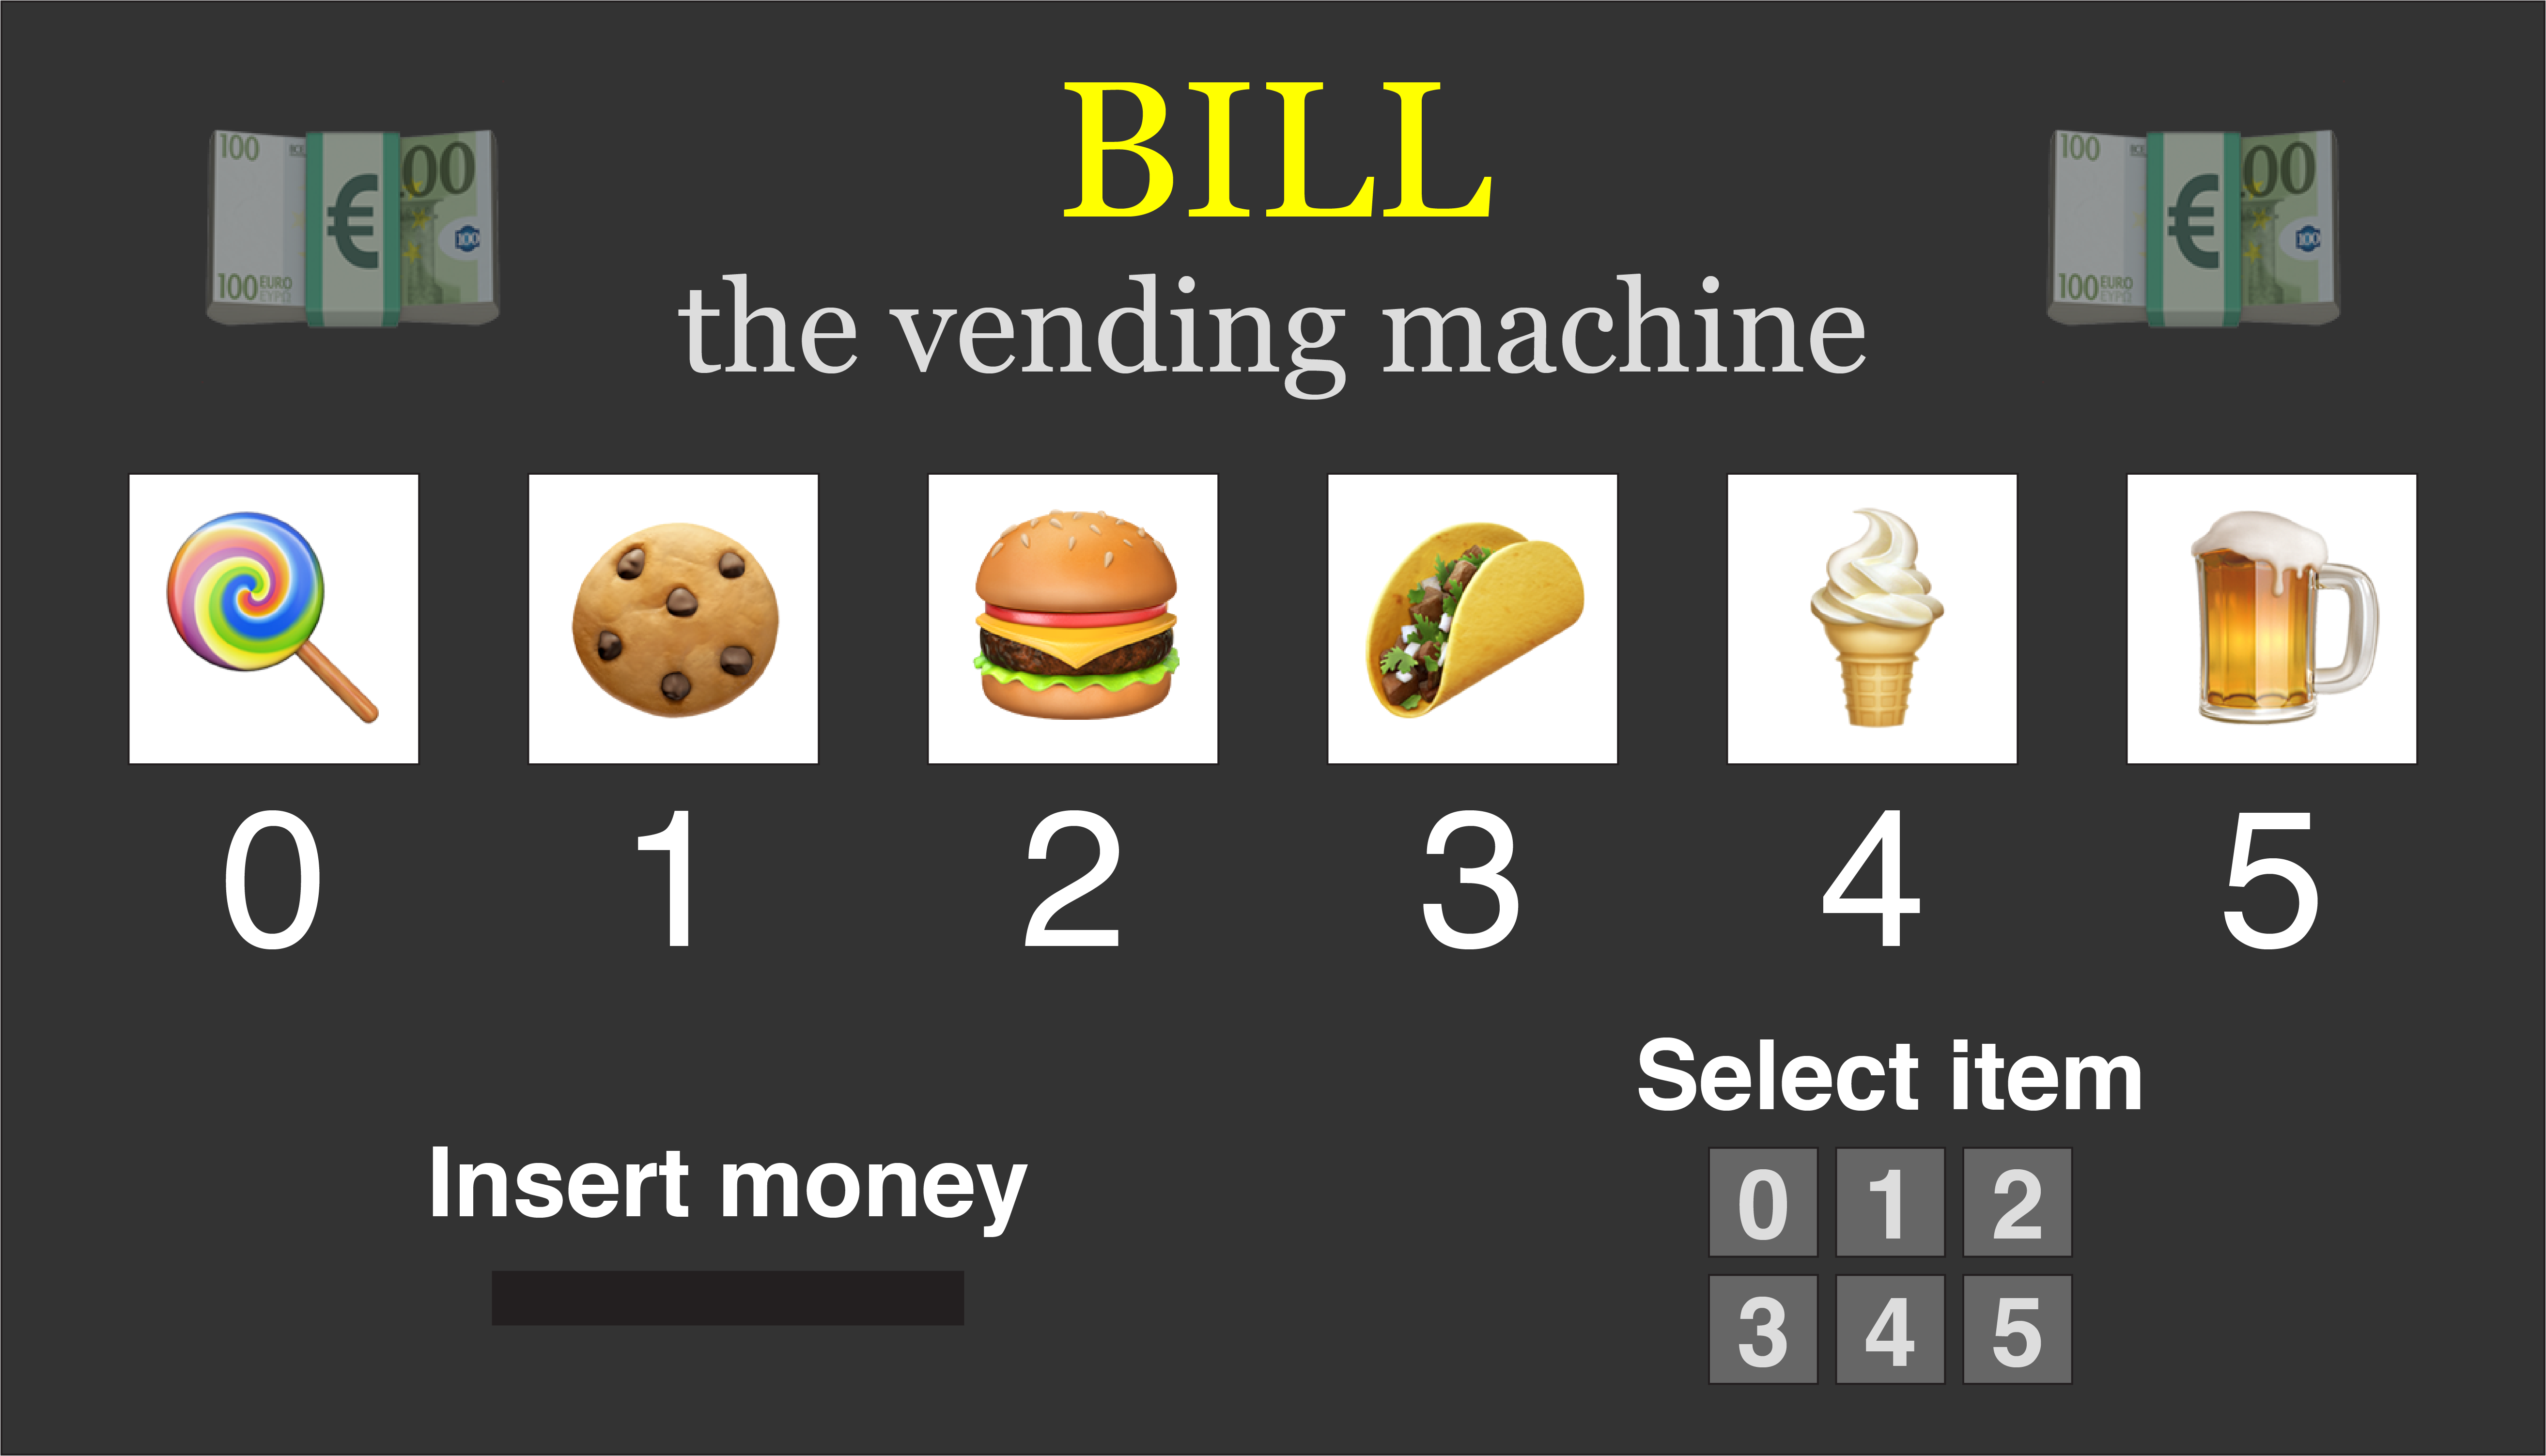

Como puede ver, Bill es una máquina expendedora que contiene 6 artículos. Al igual que las listas de Python, la lista de elementos disponibles de Bill comienza en 0 y aumenta en incrementos de 1.

La forma en que funciona Bill es que inserta su dinero y luego selecciona la ubicación del artículo que desea recibir. En una analogía con Python, podríamos decir que Bill es simplemente una lista de alimentos y los botones que presionas para obtenerlos son los valores del índice. Por ejemplo, si desea comprar un taco de Bill, debe presionar el botón 3. Si tuviéramos una lista de Python llamada Bill, una operación equivalente podría ser simplemente.

In [9]:
bill = ["paletta", "galleta", "burguer", "taco", "helado", "cerveza"]

print(bill[3])


taco


### Número de elementos en una lista

Podemos encontrar la longitud de una lista usando la función `len()`. Úselo a continuación para verificar la longitud de la lista de nombres de estaciones.

In [10]:
# Revisar la longitud de la lista
len(nombre_estaciones)

4

Tal como se esperaba, hay 4 valores en nuestra lista y `len(nombre_estaciones)` devuelve un valor de 4

### Tipos de datos en las listas

Las pueden almacenar más de un tipo de datos, vamos a onsiderar que además de tener una lista de cada nombre de estación, **FMISID, latitud, etc**., nos gustaría tener una lista de todos los valores de la estación "Helsinki Kaivopuisto". Antes de crear esta lista, debemos definir algunos valores relacionados con la estación Helsinki Kaivopuisto.

In [11]:
nombre = "Helsinki Kaivopuisto"
id_nombre = 132310
latitud_estacion = 60.15
longitud_estacion = 24.96
tipo_estacion = "Mareografías"

In [12]:
estation_hel_kaivo = [nombre, id_nombre, latitud_estacion, longitud_estacion, tipo_estacion]
print(estation_hel_kaivo)

['Helsinki Kaivopuisto', 132310, 60.15, 24.96, 'Mareografías']


Aquí tenemos una lista con 3 tipos diferentes de datos. Podemos confirmar esto usando la función `type()`. Revisemos el tipo de `estation_hel_kaivo`, luego los tipos de valores en los índices 0-2 en las celdas de abajo.

In [13]:
type(estation_hel_kaivo)

list

In [14]:
# Acceder al nombre de la estación
type(estation_hel_kaivo[0])

str

In [15]:
# Acceder al ID
type(estation_hel_kaivo[1])

int

In [16]:
# Acceder a la latitud de la estación
type(estation_hel_kaivo[2])

float

### Agregar y remover valores de la lista

Finalmente podemos agregar y borrar valores de las listas para cambiar su longitud, vamos a considerar que ya no queremos incluir el primer valor en la lista `nombre_estaciones`. Como no hemos visto esa lista en un momento, primero imprimámosla en la pantalla.

In [17]:
print(nombre_estaciones)

['Helsinki Harmaja', 'Helsinki Kaisaniemi', 'Helsinki Kaivopuisto', 'Helsinki Kumpula']


La función `del()` permite eliminar los valores de las listas, también permite ser usada para borrar valores de la memoria de **Python**, para remover el primer valor de la lista de **`nombre_estaciones`**, podemos simplemente escribir `del nombre_estaciones[0]`, si luego imprime la lista **`nombre_estaciones`**, debería ver que se ha eliminado el primer valor.

In [18]:
del nombre_estaciones[0]

In [19]:
# Ver el resultado de la variable nombre estaciones
print(nombre_estaciones)

['Helsinki Kaisaniemi', 'Helsinki Kaivopuisto', 'Helsinki Kumpula']


Si en cambio quisiéramos agregar algunas muestras a la lista **`nombre_estaciones`**, podemos escribir **`nombre_estaciones.add("Lista de los elemntos a agregar)`**, donde la `lista de los elementos a agregar` debería ser el texto que debería ser agregado a la lista, en este ejemplo vamos a agregar dos valores a nuestra lista (`'Helsinki lighthouse'` y `'Helsinki Malmi airfield'`), después imprimir el resultado de la nueva adhesión.

In [20]:
# Agregar los nuevos valores a la lista
nombre_estaciones.append("Helsinki lighthouse")
nombre_estaciones.append("Helsinki Malmi airfield")

# imprimir el resultado de la nueva adhesión
print(nombre_estaciones)

['Helsinki Kaisaniemi', 'Helsinki Kaivopuisto', 'Helsinki Kumpula', 'Helsinki lighthouse', 'Helsinki Malmi airfield']


Como puede ver, agregamos valores uno a la vez usando `nombre_estaciones.append()`. `list.append()` se denomina método en **Python**, que es una función que funciona para un tipo de datos dado (una lista en este caso). Veremos algunos otros ejemplos de métodos de lista útiles a continuación.

### ¿Agregar a un número entero? No tan rapido…

Consideremos nuestra lista de **`nombre_estaciones`**. Como sabemos, ya tenemos datos en la lista de **`nombre_estaciones`**, y podemos modificar esos datos usando métodos incorporados como `nombre_estaciones.append()`. En este caso, el método `append()` es algo que existe para las listas, pero no para otros tipos de datos. Es intuitivo que le gustaría agregar (o agregar) cosas a una lista, pero tal vez no tenga sentido agregar a otros tipos de datos. A continuación, creemos una variable `nombre_estaciones_long` que podemos usar para almacenar la longitud de la lista `nombre_estaciones`. Luego podemos imprimir el valor de `nombre_estaciones_long` para confirmar que la longitud es correcta.

In [21]:
# Definir la nueva variable de nombre_estaciones_long`
nombre_estaciones_long = len(nombre_estaciones)

# Imprimir el resultado de la variable `nombre_estaciones_long`
print(nombre_estaciones_long)

5


Si verificamos el tipo de datos de `nombre_estaciones_long`, podemos ver que es un valor entero, como se esperaba (haga eso a continuación). ¿Qué sucede si intenta agregar el valor 1 a `nombre_estaciones_long`?

In [22]:
type(nombre_estaciones_long)

int

In [23]:
# nombre_estaciones_long.append(1)

Aquí obtenemos un **AttributeError** porque no hay un método integrado en el tipo de datos **int** para agregar a los datos **int**. Si bien `append()` tiene sentido para los datos de lista, no lo es para los datos int, que es la razón por la que no existe tal método para los datos int.

### Algunos otros métodos de lista útiles

Con las listas podemos hacer una serie de cosas útiles, como contar el número de veces que aparece un valor en una lista o dónde aparece. El método `list.count()` se puede utilizar para encontrar el número de instancias de un elemento en una lista. Por ejemplo, podemos comprobar cuántas veces aparece `'Helsinki Kumpula'` en nuestra lista `nombre_estaciones` escribiendo `nombre_estaciones.count('Helsinki Kumpula')`

In [24]:
# El método count cuenta el número de ocurrencias de un valor
nombre_estaciones.count("Helsinki Kumpula")

1

De manera similar, podemos usar el método `list.index()` para encontrar el valor de índice de un elemento dado en una lista. Usemos la celda de abajo para encontrar el índice de `'Helsinki Kumpula'` en la lista `nombre_estaciones`.

In [25]:
# El método .index() da el índice del valor de un elemento en una lista
nombre_estaciones.index("Helsinki Kumpula")

2

La buena noticia aquí es que el nombre de nuestra estación seleccionada solo está en la lista una vez. Si tuviéramos que modificarlo por alguna razón, ahora también sabemos dónde está en la lista (índice 2).

Hay otros dos métodos comunes para las listas que necesitamos ver.

### Invertir una lista

Primero, está el método `list.reverse()`, se utiliza para invertir el orden de los elementos de una lista. Invirtamos nuestra lista de `nombre_estaciones` a continuación y luego imprimamos los resultados.

In [26]:
nombre_estaciones.reverse()

# Imprimir el nuevo acomo de la lista
print(nombre_estaciones)

['Helsinki Malmi airfield', 'Helsinki lighthouse', 'Helsinki Kumpula', 'Helsinki Kaivopuisto', 'Helsinki Kaisaniemi']


### Ordenar una lista

El método `list.sort()` trabaja de la misma manera, vamos a ordenar nuestra lista de `nombre_estaciones` e imprimir su contenido

In [27]:
nombre_estaciones.sort()

# Imprimir nuestra lista
print(nombre_estaciones)

['Helsinki Kaisaniemi', 'Helsinki Kaivopuisto', 'Helsinki Kumpula', 'Helsinki Malmi airfield', 'Helsinki lighthouse']


Como tu puedes observar, la lista ha sido ordenada alfabéticamente usando el método `list.sort()`, pero no hay salida de pantalla cuando esto ocurre. Nuevamente, si asignara esa salida a `nombre_estaciones`, la lista se ordenaría, pero el contenido se asignaría a None.

### Hacer que diferentes tipos de datos funcionen juntos

En la lección anterior aprendimos cómo determinar el tipo de datos de una variable (tietotyyppi) y también vimos algunos ejemplos de qué tipos de datos son compatibles entre sí. Continuaremos con ese tema aquí y aprenderemos cómo permitir que datos de diferentes tipos trabajen juntos.

#### Recordatorio: tipos de datos y su compatibilidad

Podemos explorar los diferentes tipos de datos almacenados en variables, usando la función de `tyoe()`, vamos a usar la celda de abajo para revisar los tipos de datos de las variables `nombre_estaciones, ID,` y la `latitud`

In [28]:
print("Tipo de dato de nombre:")
print(type(nombre))
print("\n")
print("Tipo de dato de ID")
print(type(id_nombre))
print("\n")
print("Tipo de dato de Latitud")
print(type(latitud_estacion))

Tipo de dato de nombre:
<class 'str'>


Tipo de dato de ID
<class 'int'>


Tipo de dato de Latitud
<class 'float'>


Como era de esperarse la variable de `nombre` es un `string`, la variable de `id_nombre` es de tipo `integer`, y la variable de `latitud_estacion` es de tipo `float`

Que pasa cuando tu intentas agragr las variables de `nombre` y de `id_nombre`, en la celda de abajo

In [29]:
# nombre + id_nombre

Aquí obtenemos un **TypeError**, por **Python**, no sabe como combinar un `string`, con un valor `integer`

#### Converting data from one type to another

No es el caso de que cosas como `nombre` y `id_nombre` no se puedan combinar en absoluto, pero para combinar una cadena de caracteres con un número, necesitamos realizar una conversión de tipo de datos para hacerlos compatibles. Convirtamos `id_nombre` en un `string` usando la función **`str()`**. Podemos almacenar la variable convertida como `id_nombre_str`.

In [30]:
id_nombre_str = str(id_nombre)
print(type(id_nombre_str))
print("\n")
print(id_nombre_str)

<class 'str'>


132310


Observe que el número ahora está entre comillas. Como puede ver, `str()` convierte un valor numérico en un `string` con los mismos números que antes.

#### Combinando texto y números

Aunque la mayoría de las operaciones matemáticas operan con valores numéricos, una forma común de combinar cadenas de caracteres es usar el operador de suma **+**. Creemos una cadena de texto en la variable `nombre_id_estacion` que es la combinación de las variables `nombre` y `id_nombre`. Una vez que definamos `nombre_id_estacion`, podemos imprimirlo en la pantalla para ver el resultado.

In [31]:
nombre_id_estacion = nombre + ": "+ str(id_nombre)
print(nombre_id_estacion)

Helsinki Kaivopuisto: 132310


Tenga en cuenta que aquí estamos convirtiendo `id_nombre` en un `string` usando la función `str()` dentro de la asignación a la variable `nombre_id_estacion`. Alternativamente, podríamos haber agregado simplemente `nombre` y `id_nombre_str`

#### Combinando texto y núemros

El ejemplo anterior demostró cómo es posible combinar cadenas de caracteres y números (convertidos en cadenas de caracteres) juntos usando el operador +. Aunque este enfoque funciona, puede volverse bastante laborioso y propenso a errores cuando se trabaja con conjuntos más complicados de componentes textuales y / o numéricos. Además, a veces es deseable formatear la salida numérica para cambiar el número de lugares decimales para valores de coma flotante, por ejemplo. Por lo tanto, a continuación mostramos algunas técnicas útiles que hacen que la manipulación de cadenas sea más fácil y eficiente.

Hay tres enfoques que pueden ser usado para manipular `strings` en **Python**:



1.   f-strings
2.   El método `.format()`
3.   Usando el operado de `%`


Se recomienda el enfoque de f-string y el más moderno, introducido en Python 3.6. Sin embargo, dado que es probable que encuentre ejemplos de los enfoques más antiguos, también mostramos cómo funcionan.

##### Formato f-String

Aquí, mostramos cómo podemos combinar el texto `nombre_estacion`, `id_nombre` número entero y otro número de punto flotante `temp` utilizando el enfoque de formato de cadena **`f`** de **Python**. Además, redondearemos simultáneamente el número de coma flotante (`temp`) a dos lugares decimales. 

In [32]:
# Temperatura con muchos decimales
temp = 18.56789876

In [33]:
# Primero el enfoque de f-string (recomendado)
texto_infor = f"La temperatura en la estación {nombre} \
(ID: {id_nombre}) es {temp:.2f} Celsius"

# Imprimir el resultado
print(texto_infor)

La temperatura en la estación Helsinki Kaivopuisto (ID: 132310) es 18.57 Celsius


In [34]:
nombre_estaciones

['Helsinki Kaisaniemi',
 'Helsinki Kaivopuisto',
 'Helsinki Kumpula',
 'Helsinki Malmi airfield',
 'Helsinki lighthouse']

ntonces, aquí hemos logrado combinar tres tipos de datos diferentes y formatear el valor de punto flotante en una sola línea. Analicemos un poco la cuerda `f` para entender cómo funciona.

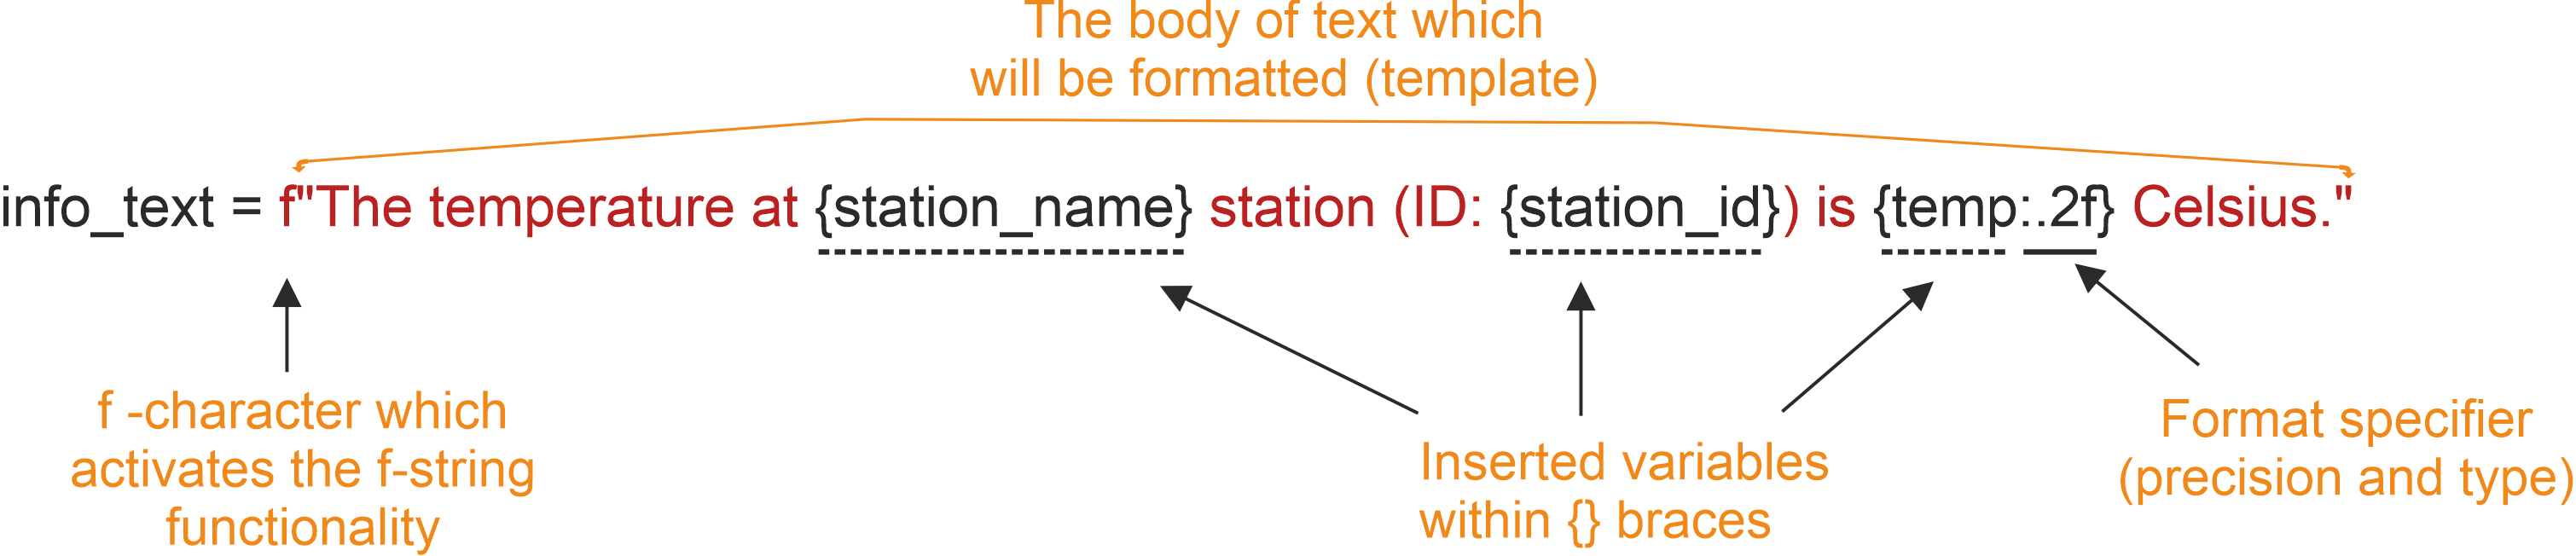

Los componentes clave aquí son:

1.   El texto que queremos crear y/o modificar es encerrado dentro de comillas antes del métodod `f`
2.   Tú puedes incluir cualquier variable existente en la plantilla de texto colocando el nombre de la variable dentro de un conjunto de llaves `{}`.
      *   Con el formato `string`, también es posible insertar números (como `id_nombre` y `temp`) en el cuerpo del texto sin necesidad de convertir primero el tipo de datos en una cadena. Esto se debe a que la funcionalidad `f-string` realiza la conversión del tipo de datos por nosotros.
3.   Es posible redondear números sobre la marcha con una precisión específica, como dos puntos decimales como en nuestro ejemplo, agregando un especificador de formato (`:.2f`) después de la variable que queremos formatear. 
      *   El especificador de formato funciona agregando primero dos `puntos(:)` después del nombre de la variable.
      *   La precisión decimal se puede especificar agregando un `punto(.)` Seguido de un número que indica el número de lugares decimales (**dos en nuestro caso**).
      *   El carácter final `f` en el especificador de formato que define el tipo de conversión que se llevará a cabo : 
             * `f` convertirá el valor a un número decimal
             * `e` hará que el número aparezca en notación científica
             * `%` convertirá el valor en un porcentaje

De lo anterior, lo más importante es recordar incluir la `f` al comienzo de sus cadenas de `f:)`.

##### Otros enfoques para formatear cadenas (no recomendado)

Como se mencionó anteriormente, existen otros enfoques que se pueden usar para dar formato al texto y combinar diferentes tipos de datos. El primero es el método `.format()`. Por ejemplo:

In [35]:
# Segndo el enfoque .format(), (ya no se recomienda)
texto_infor2 = "La temperatura en {0} estación (ID: {1}) es de {2:.2f} Celsius.".format(nombre, id_nombre, temp)

# Imprimir el resultado
print(texto_infor2)

La temperatura en Helsinki Kaivopuisto estación (ID: 132310) es de 18.57 Celsius.


Como puedes ver, aquí obtenemos el mismo resultado que con `f-strings` usando el método `.format()`, que se coloca después de las comillas. Los marcadores de posición se insertan dentro de llaves donde los números se refieren al orden de las variables enumeradas en la función `.format()`. Hay otras formas de utilizar este mismo enfoque, pero el ejemplo anterior es típico.

El último enfoque de formato `string` (histórico) es utilizar el operador `%`. En este enfoque, el marcador de posición `%` se agrega entre las comillas y las variables que se insertan en el cuerpo del texto se colocan entre paréntesis después de otro operador `%`, así:

In [36]:
# Tercero el operado %, es un enfoque que ya no se recomienda
texto_infor3 = "La temperatura en %s estación (ID: %s) es de %.2f Celsius." % (
    nombre,
     id_nombre,
      temp)

# Imprimir el resultado
print(texto_infor3)

La temperatura en Helsinki Kaivopuisto estación (ID: 132310) es de 18.57 Celsius.


El orden de las variables entre paréntesis especifica qué `%` de marcador de posición recibirá qué información y el número de variables debe ser exactamente el mismo que el número de `%` de marcadores de posición dentro de la plantilla de texto.

##### Más información sobre cómo dar formato a texto y números

Por supuesto, se puede hacer mucho más para formatear e interactuar con cadenas de caracteres y números. Para obtener más información, consulte los sitios vinculados a continuación.

*   [Técnicas comunes de manipulación de cadenas de Introducción a Python para el análisis de datos geográficos](https://python-gis-book.readthedocs.io/en/develop/part1/chapter-02/nb/00-python-basics.html#common-string-manipulation-techniques)
*   [Documentación de Python: PEP 498 - Interpolación de cadenas literal](https://www.python.org/dev/peps/pep-0498/)



### [Ejercicio 1](https://github.com/Geo-Python-2021/Exercise-1)

#### Cocinando algo de Python

En la lección "Taste of Python" de esta semana, hemos aprendido algunas cosas básicas en Python. Ahora tienes la oportunidad de demostrar tus habilidades.

Este ejercicio está inspirado en un análisis que determinó que Finlandia es el país más feliz del mundo. Como instructores del curso Geo-Python, creemos que hemos encontrado una mejor manera de evaluar la felicidad individual de las personas en Finlandia (¡particularmente de aquellos que toman este curso!), Y vamos a probar nuestra idea con ustedes. En cinco sencillos pasos (o problemas) podremos revelar tu felicidad basándonos en dos de los factores de felicidad más importantes de la vida: ¡el helado y el sueño!

#### Problema 0 - Crear nuestro propio Coolab

#### Problema 1 - Definiendo algunas variables



1.   Crear una variable llamada `ice_cream_rating`, y usar esta para alamacenar un valor entero (número entero), entre 0 y 10 que refleja su opinión general sobre cuánto disfruta comiendo helado.
2.   Cree otra variable llamada `sleeping_rating` y úsela para almacenar otro número entero entre 0 y 10 que refleje su opinión sobre cuánto disfruta durmiendo.
3.   Correr la celda persionando `Shift-Enter.`


In [38]:

# Definir variables
print("Variable del Helado")
ice_cream_rating = int(input("Del 0 al 10 1ue tanto te gusta el helado:"))
print(ice_cream_rating)
print("\n")

print("Variable de Dormir")
sleeping_rating = int(input("Del 0 al 10 1ue tanto te gusta dormir:"))
print(sleeping_rating)

Variable del Helado
Del 0 al 10 1ue tanto te gusta el helado:8
8


Variable de Dormir
Del 0 al 10 1ue tanto te gusta dormir:9
9


#### Problema 2 - Lectura de valores variables

1. Use la función `input()` para pedirle al usuario que ingrese su nombre y lo almacene en una variable llamada `first_name`.

2. Use la función `input()` nuevamente para pedirle al usuario que ingrese su apellido y lo almacene en una variable llamada last_name. (Opcional) Defina una tercera variable llamada `my_name` que combinará el nombre y apellido del usuario en una sola cadena de caracteres con un espacio entre los nombres.

3. Ejecute la celda e ingrese la información solicitada cuando se le indique.

In [39]:
# Definir las variables con input()
first_name = input("Ingresa tu primer nombre:")
last_name = input("Ingresa tu Apellido:")
mi_nombre = first_name + " " + last_name
print("El nombre completo del usuario es:", mi_nombre)

Ingresa tu primer nombre:Jorge
Ingresa tu Apellido:Rodríguez
El nombre completo del usuario es: Jorge Rodríguez


#### Problema 3: un poco de matemáticas

Para evaluar la felicidad es necesario combinar las calificaciones de helado y sueño. Para hacer esto:

1.   Calcualr el promedio de tus variables de `ice_cream_rating` y `sleeping_rating` y alamacenar el valor resultante en una variable llamada `happiness_rating`
2.   Correr la celda persionando `Shift-Enter.`

In [40]:
happiness_rating = (ice_cream_rating + sleeping_rating)/2
print("Mi promedio de feclicidad es:", happiness_rating)

Mi promedio de feclicidad es: 8.5


#### Problema 4 Revisar los tipos de datos

El siguiente paso es investigar los tipos de datos con los que estamos trabajando. En otra celda de **Python**:

1.   Use una función de **Python** incorporada para verificar los tipos de datos de las variables `ice_cream_rating`, `first_name` y `happiness_rating`. Para ver los tipos de datos para más de una variable en una sola celda de **Python**, necesitará imprimir estos valores usando otra función incorporada de **Python**.
2.   Ejecute la celda presionando Shift-Enter.
3. ¿Todos los tipos de datos tenían sentido? ¿Hubo algún tipo de datos que fuera diferente de lo que esperaba? En la nueva celda de Python que apareció después de ejecutar el código anterior, ingrese sus respuestas a las preguntas anteriores.

In [41]:
print("Tipo de dato de Helado:")
print(type(ice_cream_rating))
print("\n")
print("Tipo de dato de Dormir")
print(type(first_name))
print("\n")
print("Tipo de dato de Felicidad")
print(type(happiness_rating))

Tipo de dato de Helado:
<class 'int'>


Tipo de dato de Dormir
<class 'str'>


Tipo de dato de Felicidad
<class 'float'>


#### Problema 5 Mostrar el texto en la pantalla

Finalmente, puede usar sus habilidades de Python para generar resultados en la pantalla similar a la que se muestra a continuación. Utilice un comando para generar cada línea de salida.

Su primera tarea para esta semana es crear una lista de estaciones de observación **FMI** y los años en que comenzaron a operar. Luego agregará algunas estaciones más y años de operación a sus listas, y finalmente ordenará las listas de modo que la estación más nueva sea la primera en la lista de años de operación. Encontrará la lista de estaciones y los años en los que comenzaron a operar a continuación.

In [53]:
print("Mi nombre es", first_name, "y yo le doy a comer helado, una puntuación de",ice_cream_rating,"de 10.")
print("Por otro lado a mi índice de disfrute del sueño es de", sleeping_rating,"de 10.")
print("Según los factores anteriores, mi índice de felicidad es", happiness_rating, "de 10, ¡o un 85 %!")

Mi nombre es Jorge y yo le doy a comer helado, una puntuación de 8 de 10.
Por otro lado a mi índice de disfrute del sueño es de 9 de 10.
Según los factores anteriores, mi índice de felicidad es 8.5 de 10, ¡o un 85 %!


### Ejercicio 2 - Listas e índices

El ejercicio de esta semana está destinado a ayudarlo a comprender mejor las listas en **Python** y a practicar cómo guardar cambios en sus archivos usando **Git** y **GitHub**. También podrá practicar la sintaxis de **Markdown**.

El ejercicio 2 consta de 3 problemas. Para cada problema, debe modificar el portátil agregando sus propias soluciones.